In [1]:
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

**Exploring the datasets**

Genres dataset has 164 lines and 4 features.
Echonest dataset has 11440 lines and 8 features.
Tracks dataset has 99995 lines and 13 features.
Spectral dataset has 99995 lines and 21 features.
NA values in each column of genres dataset:
genre_parent_id    13
dtype: int64
NA values in each column of echonest dataset:
danceability     19
speechiness     150
valence          21
dtype: int64
NA values in each column of tracks dataset:
album_title           911
artist_latitude     59788
artist_longitude    59788
genre_top           55362
title                   1
dtype: int64
NA values in each column of spectral dataset:
Series([], dtype: int64)


/var/folders/8w/3lg80w9149zg21tlm57prt_00000gp/T/ipykernel_9089/4206925099.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=na_pct.values, y=na_pct.index, palette='viridis')
/var/folders/8w/3lg80w9149zg21tlm57prt_00000gp/T/ipykernel_9089/4206925099.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=na_pct.values, y=na_pct.index, palette='viridis')
/var/folders/8w/3lg80w9149zg21tlm57prt_00000gp/T/ipykernel_9089/4206925099.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=na_pct.values, y=na_pct.index, palette='viridis')


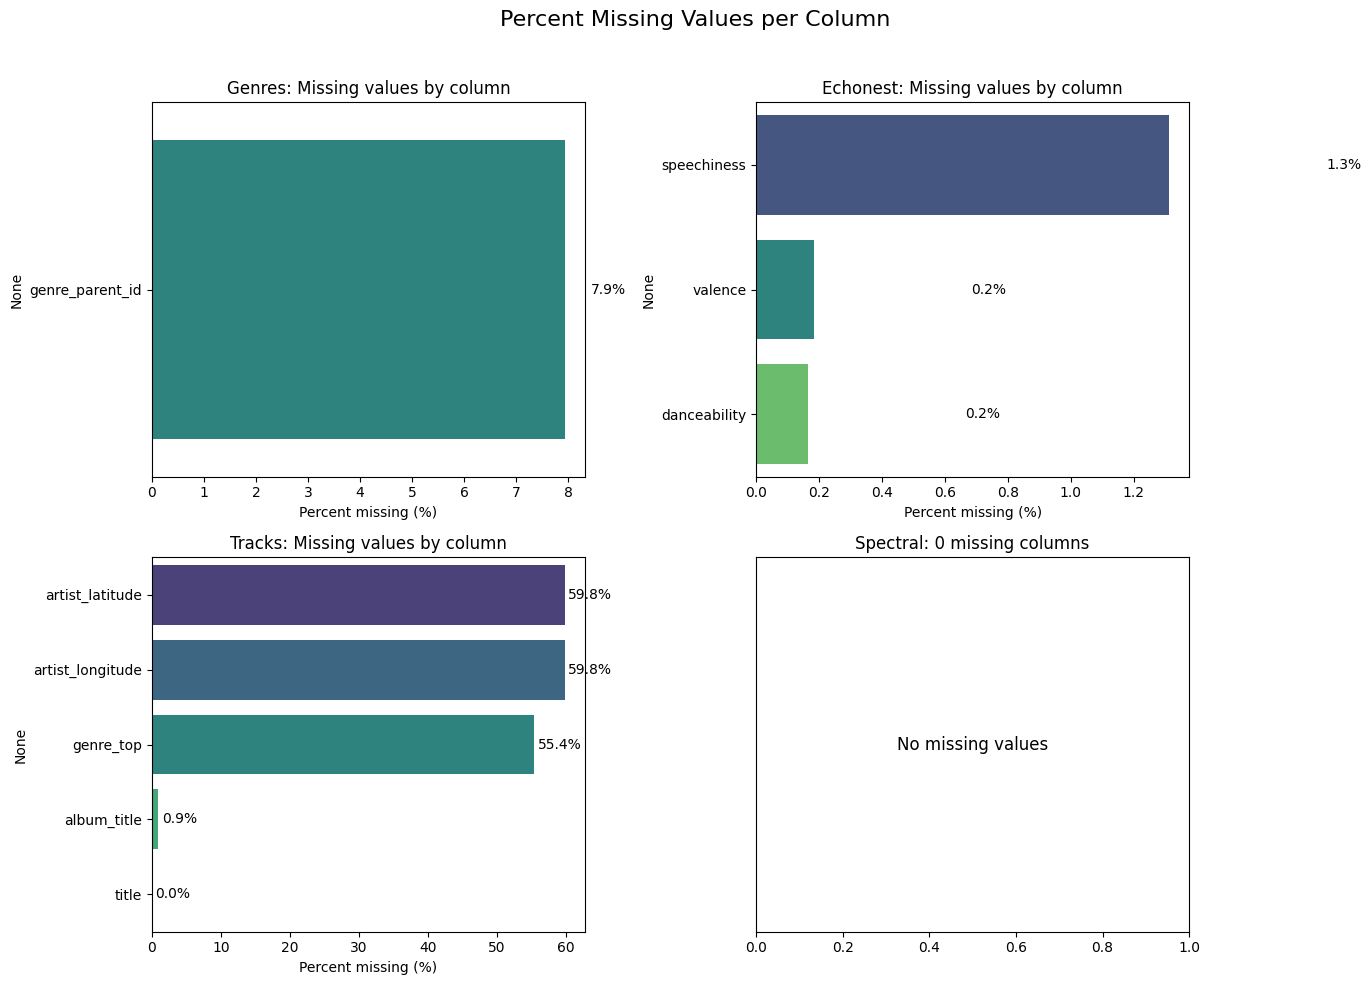

In [2]:
# Explore different datasets
# Load the genres dataset
genres_path = os.path.join('data', 'genres.csv')
genres = pd.read_csv(genres_path)

echonest_path = os.path.join('data', 'echonest_features.tsv')
echonest = pd.read_csv(echonest_path, sep='\t')

tracks_path = os.path.join('data', 'tracks.tsv')
tracks = pd.read_csv(tracks_path, sep='\t')

spectral_path = os.path.join('data', 'spectral_features.tsv')
spectral = pd.read_csv(spectral_path, sep='\t')

genres_n_features = genres.shape[1] - 1  # Exclude the label column
genres_n_lines = genres.shape[0]

print(f"Genres dataset has {genres_n_lines} lines and {genres_n_features} features.")

echonest_n_features = echonest.shape[1] - 1
echonest_n_lines = echonest.shape[0]

print(f"Echonest dataset has {echonest_n_lines} lines and {echonest_n_features} features.")

tracks_n_features = tracks.shape[1] - 1
tracks_n_lines = tracks.shape[0]

print(f"Tracks dataset has {tracks_n_lines} lines and {tracks_n_features} features.")

spectral_n_features = spectral.shape[1] - 1
spectral_n_lines = spectral.shape[0]

print(f"Spectral dataset has {spectral_n_lines} lines and {spectral_n_features} features.")


# Explore the NA values 
na_counts = genres.isna().sum()
print("NA values in each column of genres dataset:")
print(na_counts[na_counts > 0])

na_counts_echonest = echonest.isna().sum()
print("NA values in each column of echonest dataset:")
print(na_counts_echonest[na_counts_echonest > 0])

na_counts_tracks = tracks.isna().sum()
print("NA values in each column of tracks dataset:")
print(na_counts_tracks[na_counts_tracks > 0])       

na_counts_spectral = spectral.isna().sum()
print("NA values in each column of spectral dataset:")
print(na_counts_spectral[na_counts_spectral > 0])

# Clearer plots for missing values: percent missing per column
datasets = {'Genres': genres, 'Echonest': echonest, 'Tracks': tracks, 'Spectral': spectral}
plt.figure(figsize=(14, 10))
for i, (name, df) in enumerate(datasets.items(), 1):
    plt.subplot(2, 2, i)
    # percent of missing values by column (0-100)
    na_pct = df.isna().mean() * 100
    na_pct = na_pct[na_pct > 0].sort_values(ascending=False)
    if na_pct.empty:
        plt.text(0.5, 0.5, 'No missing values', ha='center', va='center', fontsize=12)
        plt.title(f'{name}: 0 missing columns')
        plt.xlabel('')
        plt.yticks([])
    else:
        sns.barplot(x=na_pct.values, y=na_pct.index, palette='viridis')
        plt.xlabel('Percent missing (%)')
        plt.title(f'{name}: Missing values by column')
        # annotate bars with percent values
        for j, v in enumerate(na_pct.values):
            plt.text(v + 0.5, j, f'{v:.1f}%', va='center')
plt.suptitle('Percent Missing Values per Column', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [3]:
# We re going to build a model to predict the genre_top
# The datset we re going to use is a merge of tracks['genre_top', genres, genre_all] and genres[genre_id,genre_handle,genre_parent_id,genre_title]
# We need to substitute the titles with ids in the genres dataset to be able to merge them

genres_id = genres[['genre_id', 'genre_parent_id', 'genre_title']]

# This is afunction that takes a colomn where features are titles and replace them with their corresponding ids from the genres_id

def replace_titles_with_ids(df, column, genres_id):
    title_to_id = dict(zip(genres_id['genre_title'], genres_id['genre_id']))
    df[column] = df[column].map(title_to_id)
    return df

print(tracks['genre_top'])

replace_titles_with_ids(tracks, 'genre_top', genres_id)
print(tracks)


0        Hip-Hop
1        Hip-Hop
2        Hip-Hop
3        Hip-Hop
4        Hip-Hop
          ...   
99990       Rock
99991       Rock
99992       Rock
99993       Rock
99994        NaN
Name: genre_top, Length: 99995, dtype: object
       track_id                    album_title  album_tracks  artist_latitude  \
0         11870           Wildahead Portibeast            10              NaN   
1         11871           Wildahead Portibeast            10              NaN   
2         11872           Wildahead Portibeast            10              NaN   
3         11873           Wildahead Portibeast            10              NaN   
4         11874           Wildahead Portibeast            10              NaN   
...         ...                            ...           ...              ...   
99990    155316  Live at Monty Hall, 2/17/2017             6              NaN   
99991    155317  Live at Monty Hall, 2/17/2017             6              NaN   
99992    155318  Live at Monty Hall, 2

In [4]:
# Turn the values in genre_top to int 
tracks['genre_top'] = tracks['genre_top'].astype('Int64')
print(tracks['genre_top'].dtype)
print(tracks)

Int64
       track_id                    album_title  album_tracks  artist_latitude  \
0         11870           Wildahead Portibeast            10              NaN   
1         11871           Wildahead Portibeast            10              NaN   
2         11872           Wildahead Portibeast            10              NaN   
3         11873           Wildahead Portibeast            10              NaN   
4         11874           Wildahead Portibeast            10              NaN   
...         ...                            ...           ...              ...   
99990    155316  Live at Monty Hall, 2/17/2017             6              NaN   
99991    155317  Live at Monty Hall, 2/17/2017             6              NaN   
99992    155318  Live at Monty Hall, 2/17/2017             6              NaN   
99993    155319  Live at Monty Hall, 2/17/2017             6              NaN   
99994    155320      What I Tell Myself Vol. 2            11              NaN   

       artist_longitu

In [5]:
# save the tracks_id dataset 
tracks.to_csv('data/tracks_id.tsv', sep='\t', index=False)


In [6]:
# Join tracks_id, spectral_features, echonest_features datasets
tracks_id = pd.read_csv('data/tracks_id.tsv', sep='\t')
spectral_features = pd.read_csv('data/spectral_features.tsv', sep='\t')
echonest_features = pd.read_csv('data/echonest_features.tsv', sep='\t')

# Make sure to replace missing values when merging with NA
merged_df = tracks_id.merge(spectral_features, on='track_id', how='left')
merged_df = merged_df.merge(echonest_features, on='track_id', how='left')

print(merged_df)
print(merged_df.shape)

       track_id                    album_title  album_tracks  artist_latitude  \
0         11870           Wildahead Portibeast            10              NaN   
1         11871           Wildahead Portibeast            10              NaN   
2         11872           Wildahead Portibeast            10              NaN   
3         11873           Wildahead Portibeast            10              NaN   
4         11874           Wildahead Portibeast            10              NaN   
...         ...                            ...           ...              ...   
99990    155316  Live at Monty Hall, 2/17/2017             6              NaN   
99991    155317  Live at Monty Hall, 2/17/2017             6              NaN   
99992    155318  Live at Monty Hall, 2/17/2017             6              NaN   
99993    155319  Live at Monty Hall, 2/17/2017             6              NaN   
99994    155320      What I Tell Myself Vol. 2            11              NaN   

       artist_longitude    

/var/folders/8w/3lg80w9149zg21tlm57prt_00000gp/T/ipykernel_9089/3438911651.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=na_pct.values, y=na_pct.index, palette='viridis')
/var/folders/8w/3lg80w9149zg21tlm57prt_00000gp/T/ipykernel_9089/3438911651.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=na_pct.values, y=na_pct.index, palette='viridis')
/var/folders/8w/3lg80w9149zg21tlm57prt_00000gp/T/ipykernel_9089/3438911651.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=na_pct.values, y=na_pct.index, palette='viridis')


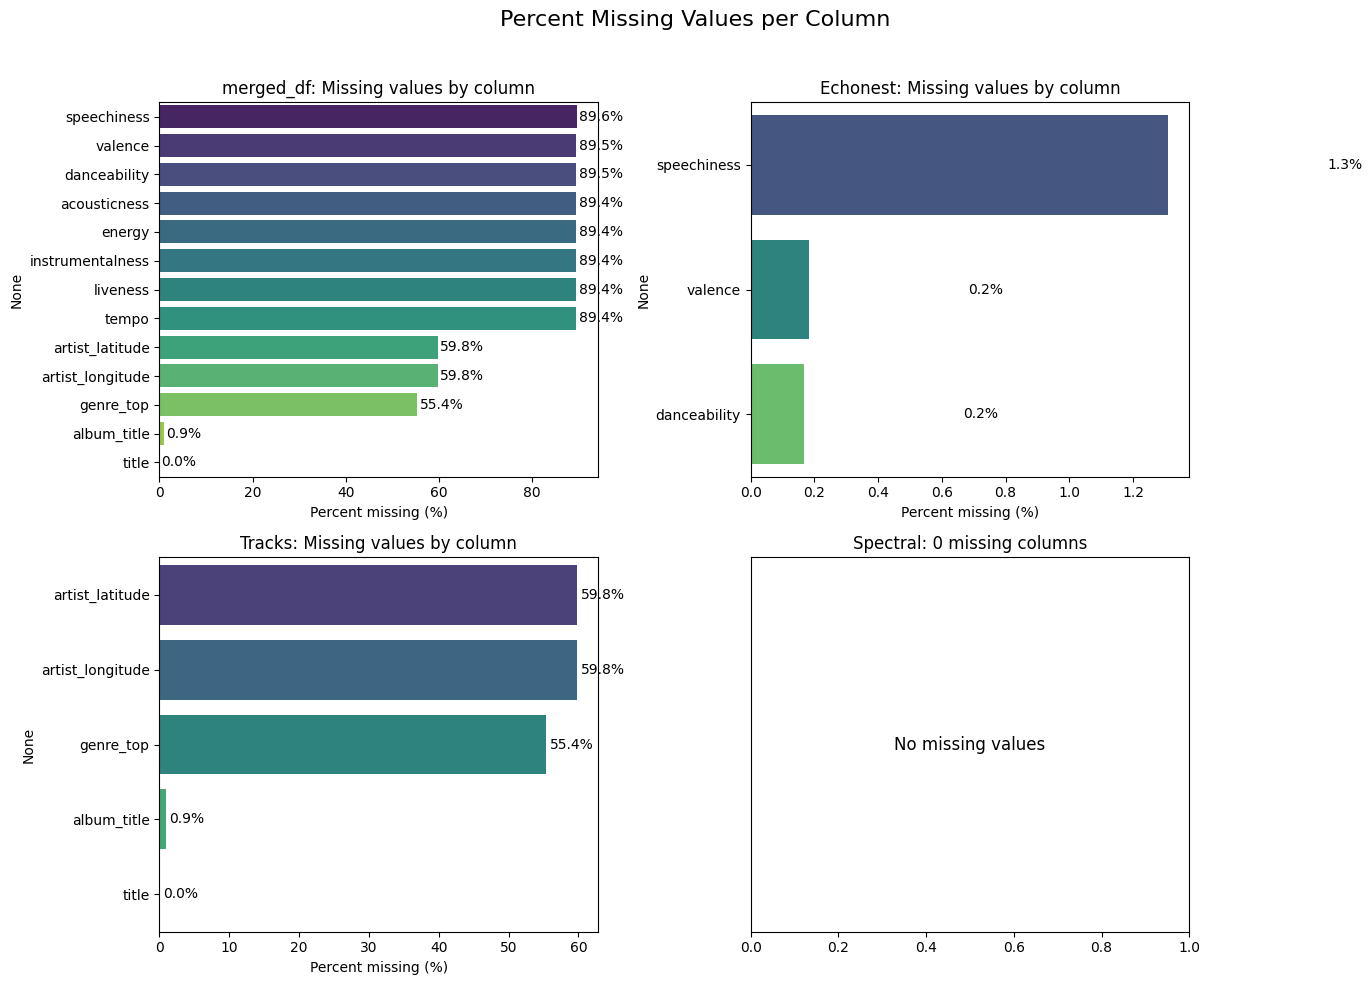

In [7]:
# Inspect na values in datsets 

datasets = {'merged_df': merged_df, 'Echonest': echonest_features, 'Tracks': tracks_id, 'Spectral': spectral_features}
plt.figure(figsize=(14, 10))
for i, (name, df) in enumerate(datasets.items(), 1):
    plt.subplot(2, 2, i)
    # percent of missing values by column (0-100)
    na_pct = df.isna().mean() * 100
    na_pct = na_pct[na_pct > 0].sort_values(ascending=False)
    if na_pct.empty:
        plt.text(0.5, 0.5, 'No missing values', ha='center', va='center', fontsize=12)
        plt.title(f'{name}: 0 missing columns')
        plt.xlabel('')
        plt.yticks([])
    else:
        sns.barplot(x=na_pct.values, y=na_pct.index, palette='viridis')
        plt.xlabel('Percent missing (%)')
        plt.title(f'{name}: Missing values by column')
        # annotate bars with percent values
        for j, v in enumerate(na_pct.values):
            plt.text(v + 0.5, j, f'{v:.1f}%', va='center')
plt.suptitle('Percent Missing Values per Column', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [8]:
merged_df1 = tracks_id.merge(spectral_features, on='track_id', how='outer')
merged_df1 = merged_df1.merge(echonest_features, on='track_id', how='outer')

print(merged_df1)
print(merged_df1.shape)

        track_id                    album_title  album_tracks  \
0          11870           Wildahead Portibeast          10.0   
1          11871           Wildahead Portibeast          10.0   
2          11872           Wildahead Portibeast          10.0   
3          11873           Wildahead Portibeast          10.0   
4          11874           Wildahead Portibeast          10.0   
...          ...                            ...           ...   
100877    155316  Live at Monty Hall, 2/17/2017           6.0   
100878    155317  Live at Monty Hall, 2/17/2017           6.0   
100879    155318  Live at Monty Hall, 2/17/2017           6.0   
100880    155319  Live at Monty Hall, 2/17/2017           6.0   
100881    155320      What I Tell Myself Vol. 2          11.0   

        artist_latitude  artist_longitude           artist_name  duration  \
0                   NaN               NaN  Wildahead Portibeast     131.0   
1                   NaN               NaN  Wildahead Portibeast  

/var/folders/8w/3lg80w9149zg21tlm57prt_00000gp/T/ipykernel_9089/2422388212.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=na_pct.values, y=na_pct.index, palette='viridis')
/var/folders/8w/3lg80w9149zg21tlm57prt_00000gp/T/ipykernel_9089/2422388212.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=na_pct.values, y=na_pct.index, palette='viridis')
/var/folders/8w/3lg80w9149zg21tlm57prt_00000gp/T/ipykernel_9089/2422388212.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=na_pct.values, y=na_pct.index, palette='viridis')


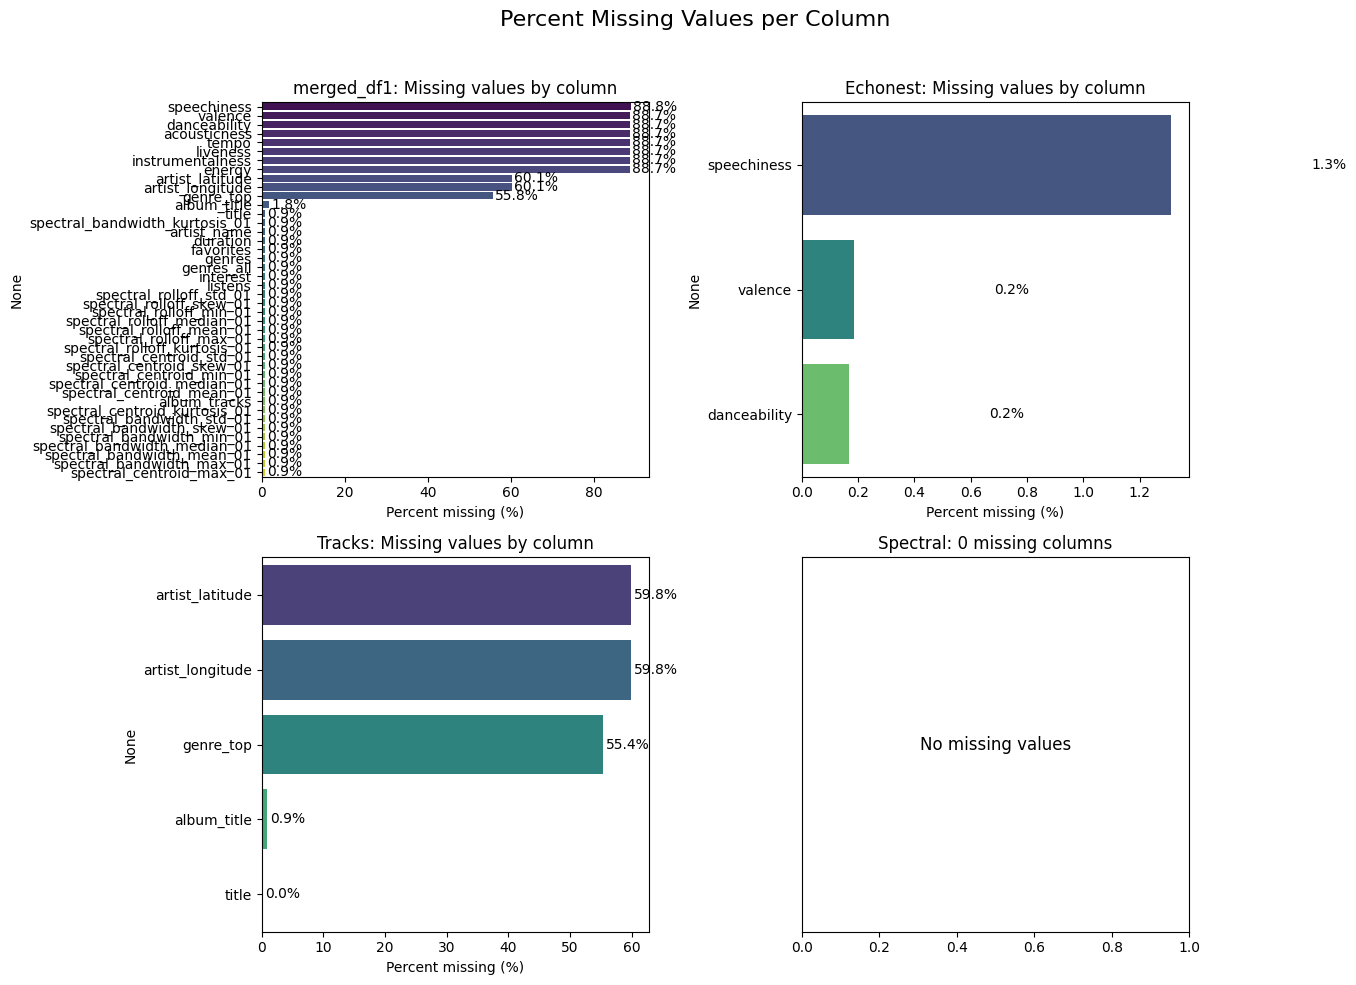

In [9]:
# Inspect na values in datsets 

datasets = {'merged_df1': merged_df1, 'Echonest': echonest_features, 'Tracks': tracks_id, 'Spectral': spectral_features}
plt.figure(figsize=(14, 10))
for i, (name, df) in enumerate(datasets.items(), 1):
    plt.subplot(2, 2, i)
    # percent of missing values by column (0-100)
    na_pct = df.isna().mean() * 100
    na_pct = na_pct[na_pct > 0].sort_values(ascending=False)
    if na_pct.empty:
        plt.text(0.5, 0.5, 'No missing values', ha='center', va='center', fontsize=12)
        plt.title(f'{name}: 0 missing columns')
        plt.xlabel('')
        plt.yticks([])
    else:
        sns.barplot(x=na_pct.values, y=na_pct.index, palette='viridis')
        plt.xlabel('Percent missing (%)')
        plt.title(f'{name}: Missing values by column')
        # annotate bars with percent values
        for j, v in enumerate(na_pct.values):
            plt.text(v + 0.5, j, f'{v:.1f}%', va='center')
plt.suptitle('Percent Missing Values per Column', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [10]:
# We re going to keep the 2nd merged dataset (merged_df1) because it has all the features and keeps NA instead of 0,000
# We can handle the NA values later during data preprocessing before model training

# save the merged dataset
merged_df1.to_csv('data/merged_dataset.tsv', sep='\t', index=False)

In [11]:
# After inspecting the genres_all and genre features to link them to how we decide on genre_top
# the hypothesis that genre_top = genres_all - genres, and if that substraction is > 1 we have no top_genre
# doesn't hold, cf. the line 28258 in tracks_id dataset
# therefore we will not use these features for now(task 1), we will only use others to predict genre_top

In [12]:
df_task1 = merged_df1.drop(columns=['genres', 'genres_all'])
# Drop the rows where genre_top is NA
df_task1 = df_task1.dropna(subset=['genre_top'])
# print numver of rows and columns
print(df_task1.shape)
# print list of features
print(df_task1.columns)

(44633, 41)
Index(['track_id', 'album_title', 'album_tracks', 'artist_latitude',
       'artist_longitude', 'artist_name', 'duration', 'favorites', 'genre_top',
       'interest', 'listens', 'title', 'spectral_bandwidth_kurtosis_01',
       'spectral_bandwidth_max_01', 'spectral_bandwidth_mean_01',
       'spectral_bandwidth_median_01', 'spectral_bandwidth_min_01',
       'spectral_bandwidth_skew_01', 'spectral_bandwidth_std_01',
       'spectral_centroid_kurtosis_01', 'spectral_centroid_max_01',
       'spectral_centroid_mean_01', 'spectral_centroid_median_01',
       'spectral_centroid_min_01', 'spectral_centroid_skew_01',
       'spectral_centroid_std_01', 'spectral_rolloff_kurtosis_01',
       'spectral_rolloff_max_01', 'spectral_rolloff_mean_01',
       'spectral_rolloff_median_01', 'spectral_rolloff_min_01',
       'spectral_rolloff_skew_01', 'spectral_rolloff_std_01', 'acousticness',
       'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness',
       'tempo', 

/Users/aya/Supervised_Challenge/helper.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=na_pct.values, y=na_pct.index, palette='viridis')


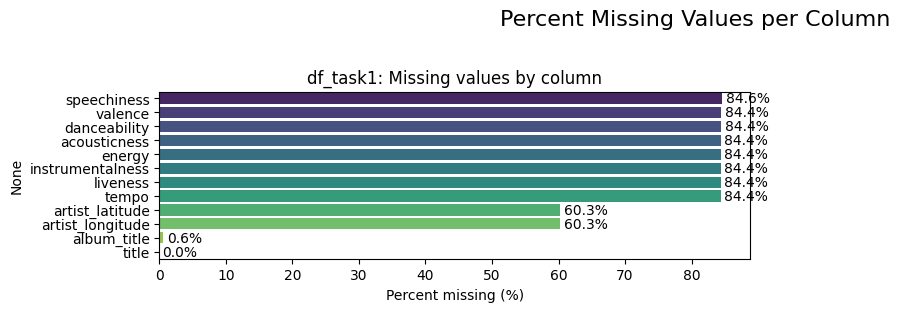

In [13]:
# inspect na values in datsets
from helper import plot_missing_values    

datasets = {'df_task1': df_task1}

plot_missing_values(datasets)

In [14]:
# Now we re going to construct a dataset where genres are titles and not numbers 
# We can use the genres_id dataset to map back the genre_top ids to titles

from collections.abc import Iterable
import ast

def replace_ids_with_titles(df, column, genres_id):
    id_to_title = dict(zip(genres_id['genre_id'], genres_id['genre_title']))
    df = df.copy()

    def map_ids(x):
        # treat iterables (lists, tuples, sets, etc.) as collections of ids
        if isinstance(x, Iterable) and not isinstance(x, (str, bytes)):
            return [id_to_title.get(i) for i in x]
        # treat scalars (single id) as one id
        return id_to_title.get(x, x)

    df[column] = df[column].apply(map_ids)
    return df

tracks['genres'] = tracks['genres'].apply(ast.literal_eval)
tracks['genres_all'] = tracks['genres_all'].apply(ast.literal_eval)


# print the type of the values in 'genres' column
print(tracks['genres'].apply(type).unique())
print(tracks['genres_all'].apply(type).unique())

tracks_titles = replace_ids_with_titles(tracks.copy(), 'genre_top', genres_id)
tracks_titles = replace_ids_with_titles(tracks_titles, 'genres', genres_id)
tracks_titles = replace_ids_with_titles(tracks_titles, 'genres_all', genres_id)




[<class 'list'>]
[<class 'list'>]


In [15]:
print(tracks_titles)


       track_id                    album_title  album_tracks  artist_latitude  \
0         11870           Wildahead Portibeast            10              NaN   
1         11871           Wildahead Portibeast            10              NaN   
2         11872           Wildahead Portibeast            10              NaN   
3         11873           Wildahead Portibeast            10              NaN   
4         11874           Wildahead Portibeast            10              NaN   
...         ...                            ...           ...              ...   
99990    155316  Live at Monty Hall, 2/17/2017             6              NaN   
99991    155317  Live at Monty Hall, 2/17/2017             6              NaN   
99992    155318  Live at Monty Hall, 2/17/2017             6              NaN   
99993    155319  Live at Monty Hall, 2/17/2017             6              NaN   
99994    155320      What I Tell Myself Vol. 2            11              NaN   

       artist_longitude    

In [16]:
# save the tracks_titles dataset
tracks_titles.to_csv('data/tracks_titles.tsv', sep='\t', index=False)

In [17]:
# We build the tree of genres 
from helper import build_genre_hierarchy

genre_tree_id, genre_tree_title, id_to_title, root_ids, root_titles = build_genre_hierarchy(genres)

# plot the genre tree
from anytree import Node, RenderTree

# 1. Build Node objects
nodes = {}
for gid, title in id_to_title.items():
    nodes[gid] = Node(f"{gid}: {title}")

# 2. Link parent -> children, skipping self-parent and simple cycles
for pid, child_ids in genre_tree_id.items():
    for cid in child_ids:
        # skip self-parent
        if cid == pid:
            continue

        child_node = nodes[cid]
        parent_node = nodes[pid]

        # skip if parent is already (directly) a child of this child
        # (prevents simple 2-node cycles)
        if parent_node in child_node.ancestors:
            continue

        child_node.parent = parent_node

# 3. Get root Node objects (nodes with no parent)
root_nodes = [n for n in nodes.values() if n.is_root]

# 4. Print each tree
for root in root_nodes:
    print(f"Tree rooted at: {root.name}")
    for pre, fill, node in RenderTree(root):
        print(f"{pre}{node.name}")


Tree rooted at: 2: International
2: International
├── 46: Latin America
│   ├── 502: Cumbia
│   ├── 808: Salsa
│   └── 1060: Tango
├── 77: French
├── 79: Reggae - Dub
│   └── 602: Reggae - Dancehall
├── 86: Indian
│   ├── 173: N. Indian Traditional
│   ├── 174: South Indian Traditional
│   └── 175: Bollywood
├── 92: African
│   ├── 81: Afrobeat
│   └── 214: North African
├── 102: Middle East
│   └── 1032: Turkish
├── 117: Polka
├── 118: Balkan
├── 130: Europe
│   ├── 524: Romany (Gypsy)
│   ├── 619: Spanish
│   ├── 741: Klezmer
│   └── 1156: Fado
├── 171: Brazilian
├── 172: Asia-Far East
├── 176: Pacific
├── 177: Celtic
├── 232: Flamenco
└── 504: Latin
Tree rooted at: 3: Blues
3: Blues
├── 14: Soul-RnB
│   ├── 11: Disco
│   └── 19: Funk
│       └── 377: Deep Funk
└── 567: Gospel
Tree rooted at: 4: Jazz
4: Jazz
├── 37: Jazz: Vocal
├── 74: Free-Jazz
├── 97: Jazz: Out
├── 178: Be-Bop
├── 179: Big Band/Swing
├── 810: Nu-Jazz
└── 906: Modern Jazz
Tree rooted at: 5: Classical
5: Classical
├─

In [18]:
# See line 580, genres is more specific than genres_all
# see line 61 034, we don't always remove the parents and keep more specific genres
# see line 7453
# see lines with Instrumental ...

# We want to explore the relationship between genres, genres_all and genre_top more deeply 
# We want to explore what levels of the genre tree are present in these features
# We define the variable depth as the distance from the root node in the genre tree
# depth = 0 for root nodes, depth = 1 for their children, etc.

def get_genre_levels(df, column, genre_tree_title, id_to_title, root_titles):
    from collections.abc import Iterable

    def is_missing(x):
        # treat scalar NA-like values as missing but don't call pd.isna on iterables
        if isinstance(x, Iterable) and not isinstance(x, (str, bytes)):
            try:
                return len(x) == 0
            except TypeError:
                return False
        return pd.isna(x)

    levels = []
    for gid in df[column]:
        if is_missing(gid):
            levels.append(np.nan)
            continue

        # normalize to an iterable of single ids
        if isinstance(gid, Iterable) and not isinstance(gid, (str, bytes)):
            ids = gid
        else:
            ids = [gid]

        max_level = -1
        for single_id in ids:
            title = id_to_title.get(single_id)
            if title is None:
                continue
            level = 0
            current_title = title
            # climb until we hit a root (stop if parent can't be found)
            while current_title not in root_titles:
                parent_id = None
                for pid, children in genre_tree_title.items():
                    if current_title in children:
                        parent_id = pid
                        break
                if parent_id is None:
                    break
                current_title = id_to_title.get(parent_id)
                level += 1
            max_level = max(max_level, level)
        levels.append(max_level if max_level != -1 else np.nan)

    return levels
        

       genre_top_level  genres_level  genres_all_level
0                  0.0           0.0               0.0
1                  0.0           0.0               0.0
2                  0.0           0.0               0.0
3                  0.0           0.0               0.0
4                  0.0           0.0               0.0
...                ...           ...               ...
99990              0.0           1.0               1.0
99991              0.0           1.0               1.0
99992              0.0           1.0               1.0
99993              0.0           1.0               1.0
99994              NaN           0.0               1.0

[99995 rows x 3 columns]


/var/folders/8w/3lg80w9149zg21tlm57prt_00000gp/T/ipykernel_9089/128192467.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='viridis')
/var/folders/8w/3lg80w9149zg21tlm57prt_00000gp/T/ipykernel_9089/128192467.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='viridis')
/var/folders/8w/3lg80w9149zg21tlm57prt_00000gp/T/ipykernel_9089/128192467.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='viridis')


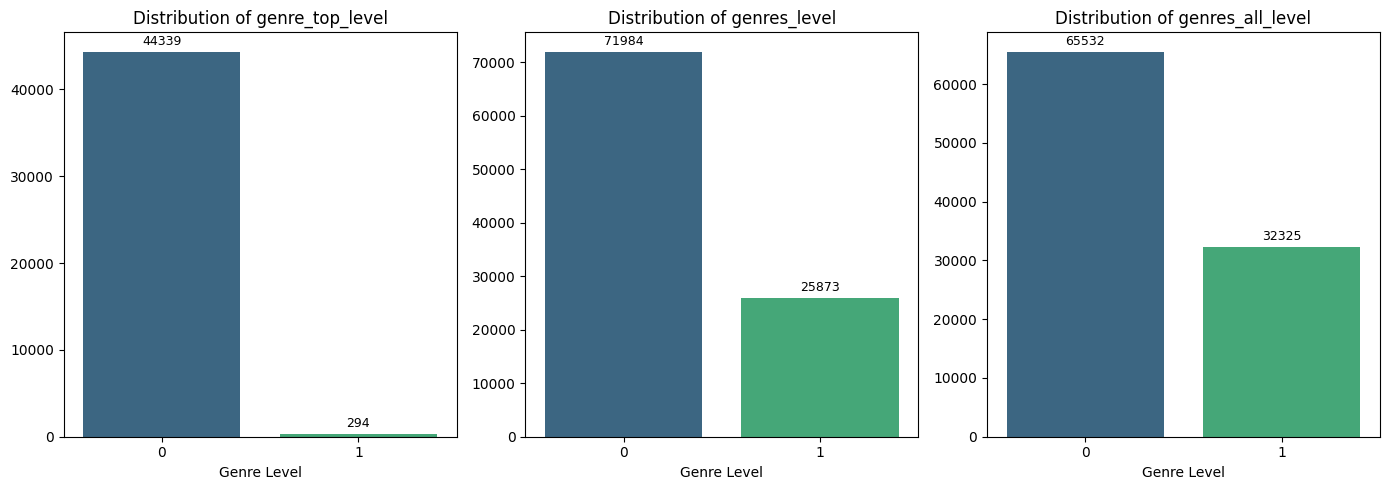

In [19]:
# Visualize the distribution of genres
df_levels = tracks.copy()
df_levels['genre_top_level'] = get_genre_levels(df_levels, 'genre_top', genre_tree_title, id_to_title, root_titles)
df_levels['genres_level'] = get_genre_levels(df_levels, 'genres', genre_tree_title, id_to_title, root_titles)
df_levels['genres_all_level'] = get_genre_levels(df_levels, 'genres_all', genre_tree_title, id_to_title, root_titles)       

print(df_levels[['genre_top_level', 'genres_level', 'genres_all_level']])

# Plot the distributions of levels as discrete integer bars (0, 1, 2, ...)
plt.figure(figsize=(14, 5))
for i, col in enumerate(['genre_top_level', 'genres_level', 'genres_all_level'], 1):
    plt.subplot(1, 3, i)
    # drop NA and convert to integers (levels are discrete)
    series = df_levels[col].dropna().astype(int)
    if series.empty:
        plt.text(0.5, 0.5, 'No data', ha='center', va='center')
        plt.title(f'Distribution of {col}')
        plt.xticks([])
        continue
    max_level = int(series.max())
    idx = list(range(0, max_level + 1))
    counts = series.value_counts().reindex(idx, fill_value=0).sort_index()
    sns.barplot(x=counts.index, y=counts.values, palette='viridis')
    plt.xlabel('Genre Level')
    plt.xticks(idx)
    plt.title(f'Distribution of {col}')
    # annotate bars with counts
    offset = max(1, counts.max() * 0.01)
    for x_val, y_val in zip(counts.index, counts.values):
        plt.text(x_val, y_val + offset, str(int(y_val)), ha='center', va='bottom', fontsize=9)
plt.tight_layout()
plt.show()


In [20]:
dict(zip(genres['genre_id'], genres['genre_parent_id']))

{1: 38.0,
 2: nan,
 3: nan,
 4: nan,
 5: nan,
 6: 38.0,
 7: 20.0,
 8: 17.0,
 9: 17.0,
 10: nan,
 11: 14.0,
 12: nan,
 13: nan,
 14: 3.0,
 15: nan,
 16: 6.0,
 17: nan,
 18: 13.0,
 19: 14.0,
 20: nan,
 21: nan,
 22: 38.0,
 25: 12.0,
 26: 12.0,
 27: 12.0,
 30: 38.0,
 31: 12.0,
 32: 38.0,
 33: 17.0,
 36: 12.0,
 37: 4.0,
 38: nan,
 41: 38.0,
 42: 15.0,
 43: 65.0,
 45: 12.0,
 46: 2.0,
 47: 38.0,
 49: 17.0,
 53: 45.0,
 58: 12.0,
 63: 9.0,
 64: 25.0,
 65: 20.0,
 66: 12.0,
 70: 12.0,
 71: 25.0,
 74: 4.0,
 76: 10.0,
 77: 2.0,
 79: 2.0,
 81: 92.0,
 83: 21.0,
 85: 12.0,
 86: 2.0,
 88: 12.0,
 89: 25.0,
 90: 53.0,
 92: 2.0,
 94: 17.0,
 97: 4.0,
 98: 12.0,
 100: 21.0,
 101: 31.0,
 102: 2.0,
 103: 17.0,
 107: 13.0,
 109: 25.0,
 111: 25.0,
 113: 26.0,
 117: 2.0,
 118: 2.0,
 125: 38.0,
 130: 2.0,
 137: 9.0,
 138: 20.0,
 166: 65.0,
 167: 31.0,
 169: 9.0,
 170: 13.0,
 171: 2.0,
 172: 2.0,
 173: 86.0,
 174: 86.0,
 175: 86.0,
 176: 2.0,
 177: 2.0,
 178: 4.0,
 179: 4.0,
 180: 17.0,
 181: 15.0,
 182: 15.0,
 1

In [21]:
# test the function

# build the mapping, the parent should be a root node, see root_nodes
# We should keep going up the tree until we reach a root node
mapping_genre_parent = {}

parent_lookup = dict(zip(genres['genre_id'], genres['genre_parent_id']))

for gid in genres['genre_id']:
    current = gid
    parent = parent_lookup.get(current)

    while True:

        # Stop if parent is NaN
        if pd.isna(parent):
            break

        # Stop if parent points to itself (self-loop)
        if parent == current:
            break

        # Otherwise climb one level
        current = parent
        parent = parent_lookup.get(current)

    # current is now a root or self-parent
    mapping_genre_parent[gid] = current




In [22]:
# shape of unique values in mapping_genre_parent
print(len(set(mapping_genre_parent.values())))

14


In [32]:
# Define a function for filling the NA values of top genre using this strategy
# 1. if there is a dominant parent in genres, aka has more occurrences or more occurences of his sons, then we assign the parent as top genre
# 2. else we do the same to genres_all
# 3. else we choose randomly from the root genres in genres list
# if the parent is na in the mapping, then the parent is himself

def fill_top_genre(df, parent_genre_map):
    import random
    df = df.copy()

    # Identify root genres (parent = itself)
    root_genres = [gid for gid, root in parent_genre_map.items() if gid == root]

    for idx, row in df.iterrows():

        # Only fill missing values
        if pd.isna(row['genre_top']):

            # ----------------------------------------------------
            # STEP 1: Dominant parent in genres
            # ----------------------------------------------------
            genre_counts = {}
            if isinstance(row['genres'], list):
                for gid in row['genres']:
                    parent = parent_genre_map.get(gid)
                    if parent is not None:
                        genre_counts[parent] = genre_counts.get(parent, 0) + 1

            if genre_counts:
                df.at[idx, 'genre_top'] = max(genre_counts, key=genre_counts.get)
                continue

            # ----------------------------------------------------
            # STEP 2: Dominant parent in genres_all
            # ----------------------------------------------------
            genre_all_counts = {}
            if isinstance(row['genres_all'], list):
                for gid in row['genres_all']:
                    parent = parent_genre_map.get(gid)
                    if parent is not None:
                        genre_all_counts[parent] = genre_all_counts.get(parent, 0) + 1

            if genre_all_counts:
                df.at[idx, 'genre_top'] = max(genre_all_counts, key=genre_all_counts.get)
                continue

            # ----------------------------------------------------
            # STEP 3: Use first available genre (genres, then genres_all)
            # ----------------------------------------------------
            genres_list = row['genres'] if isinstance(row['genres'], list) else []
            genres_all_list = row['genres_all'] if isinstance(row['genres_all'], list) else []

            # If both empty: drop row
            if len(genres_list) == 0 and len(genres_all_list) == 0:
                df = df.drop(index=idx)
                continue

            # Else pick first valid gid
            if len(genres_list) > 0:
                first_gid = genres_list[0]
            else:
                first_gid = genres_all_list[0]

            root_parent = parent_genre_map.get(first_gid, first_gid)
            df.at[idx, 'genre_top'] = root_parent

    return df




In [33]:
# remove the 
tracks_filled = fill_top_genre(tracks, mapping_genre_parent)

In [34]:
print(tracks_filled['genre_top'].isna().sum())

0


In [35]:
# save the filled dataset
tracks_filled.to_csv('data/tracks_filled_me.tsv', sep='\t', index=False)